In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

import creds

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [22]:
consumer_key = creds.consumer_key
consumer_secret = creds.consumer_secret
access_token = creds.access_token
access_token_secret = creds.access_token_secret


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [23]:
# Define the search term and the date_since date as variables
search_words = "corona" + "vaccine" + "-filter:retweets"
date_since = "2020-11-1"
total_tweets_pulled=1000
sampleS=20

In [24]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(total_tweets_pulled)

# Collect a list of tweets
all_tweets=[tweet.text for tweet in tweets]
print(all_tweets[:5])
len(all_tweets)

['#CoronaVaccine  @Dawn_News  Pak paper reporting on India positively on something benefiting #HumanityFirst.  Hope t… https://t.co/I4ZkiSlwnA', '📷 Have You Vaxxied ? 💉📷 #Vaxxie #CoronaVaccine #CoronaPandemic #CoronaVirus #COVID19 #CoronaVirusStrain… https://t.co/8kbijt12lQ', 'Have You Vaxxied ? 💉📷\n\n#Vaxxie #CoronaVaccine #CoronaPandemic #CoronaVirus #COVID19 #CoronaVirusStrain… https://t.co/D7BZ9o9Euk', 'German firm #BioNTech has warned that there is no data backing the "safety and efficacy" of delaying the second sho… https://t.co/ZjC9lIpeP1', 'Corona T-Shirts\nVery trending one\nSpecial Price 70% off get yours now\n\n#tshirt #CoronaVaccine #coronatshirts… https://t.co/SdKSYSOC76']


96

In [25]:
# Removing URl
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [26]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['CoronaVaccine DawnNews Pak paper reporting on India positively on something benefiting HumanityFirst Hope t',
 'Have You Vaxxied Vaxxie CoronaVaccine CoronaPandemic CoronaVirus COVID19 CoronaVirusStrain',
 'Have You Vaxxied Vaxxie CoronaVaccine CoronaPandemic CoronaVirus COVID19 CoronaVirusStrain',
 'German firm BioNTech has warned that there is no data backing the safety and efficacy of delaying the second sho',
 'Corona TShirtsVery trending oneSpecial Price 70 off get yours nowtshirt CoronaVaccine coronatshirts']

In [27]:
# Lowercase
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['coronavaccine',
  'dawnnews',
  'pak',
  'paper',
  'reporting',
  'on',
  'india',
  'positively',
  'on',
  'something',
  'benefiting',
  'humanityfirst',
  'hope',
  't'],
 ['have',
  'you',
  'vaxxied',
  'vaxxie',
  'coronavaccine',
  'coronapandemic',
  'coronavirus',
  'covid19',
  'coronavirusstrain']]

In [28]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\DIPTARAJ
[nltk_data]     SEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['coronavaccine',
 'dawnnews',
 'pak',
 'paper',
 'reporting',
 'india',
 'positively',
 'something',
 'benefiting',
 'humanityfirst',
 'hope']

In [40]:
collection_words = ['corona','vaccine','virus','coronavaccine','covid19','coronavirus']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
tweets_nsw_nc[0]

['dawnnews',
 'pak',
 'paper',
 'reporting',
 'india',
 'positively',
 'something',
 'benefiting',
 'humanityfirst',
 'hope']

In [41]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(sampleS)

[('india', 7),
 ('first', 7),
 ('people', 6),
 ('january', 5),
 ('vaccines', 5),
 ('covid', 5),
 ('covidvaccine', 5),
 ('govt', 5),
 ('coronavirusstrain', 4),
 ('data', 4),
 ('get', 4),
 ('need', 4),
 ('amp', 4),
 ('countries', 4),
 ('health', 4),
 ('secretary', 4),
 ('said', 4),
 ('vaxxied', 3),
 ('vaxxie', 3),
 ('coronapandemic', 3)]

In [42]:
len(counts_nsw_nc)

624

In [43]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(sampleS),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,india,7
1,first,7
2,people,6
3,january,5
4,vaccines,5


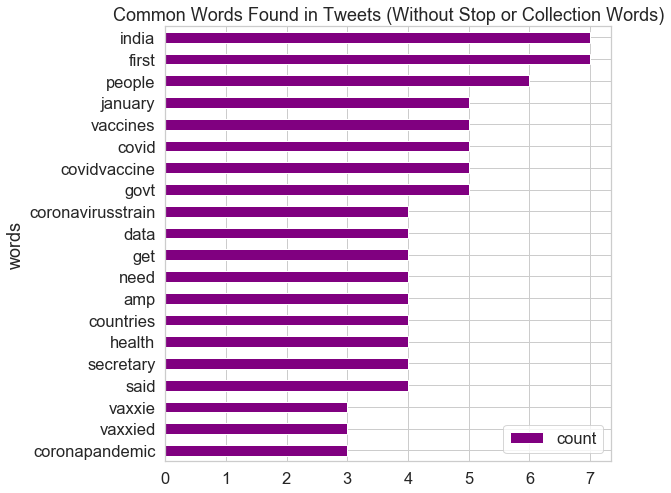

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [35]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.22727272727272727,
 TextBlob("CoronaVaccine DawnNews Pak paper reporting on India positively on something benefiting HumanityFirst Hope t"))

In [36]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.22727272727272727,
 'CoronaVaccine DawnNews Pak paper reporting on India positively on something benefiting HumanityFirst Hope t']

In [37]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.227273,CoronaVaccine DawnNews Pak paper reporting on ...
1,0.000000,Have You Vaxxied Vaxxie CoronaVaccine CoronaPa...
2,0.000000,Have You Vaxxied Vaxxie CoronaVaccine CoronaPa...
3,-0.066667,German firm BioNTech has warned that there is ...
4,0.000000,Corona TShirtsVery trending oneSpecial Price 7...


In [38]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

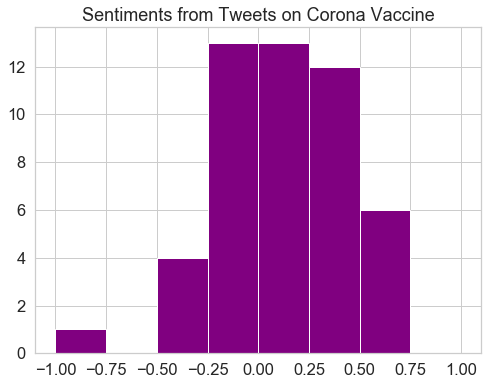

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Corona Vaccine")
plt.show()